# The impact of ENSO and AO with Arctic Albedo Anomalies

#### Imports

In [29]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy 
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker
import xesmf as xe
import matplotlib.colors as colors
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

---

## Data Overview

#### Datasets used in this project


The following datasets are used:
* Arctic Oscillation index
* Nino34 index
* ASRv2 Albedo fraction climatology
* ASRv2 Albedo fraction anomalies (2000-2016)


_All datasets contain monthly mean values. Index and anomaly datasets are in the time range 2000-01-01 to 2016-12-01. The mesh gridded Arctic System Reanalysis datasets have been regridded in a separate notebook (RegridAll.ipynb) to $0.1^{\circ}$ lat/lon grid and subset to $0-90^{\circ}$ N latitutes. The index datasets have been converted to NetCDF files with a single time dimension and subset to the same time range using the LoadAOandNino.ipynb notebook. Climatologies and anomalies were initialy calculated (on the original irregular ASR grid) using the CalculateClimAndAnoms.ipynb notebook._


In [12]:
clim_path='/home/ubuntu/asr15km.anl.2D.latlon.clim.ALBEDO.nc'
anoms_path='/home/ubuntu/asr15km.anl.2D.latlon.anoms.ALBEDO.nc'
ao_path='/home/ubuntu/indexes/ao.nc'
nino34_path='/home/ubuntu/indexes/nino34.nc'

In [13]:
clim=xr.open_dataset(clims_path)
anoms=xr.open_dataset(anoms_path)
ao=xr.open_dataset(ao_path)
nino34=xr.open_dataset(nino34_path)

* plot climatologies
* plot AO pos/neg composites
* plot pos/neg diff with significance from ttest_ind
* plot anomaly-ao correlation
* plot anomaly-nino34 correlation
* calculate and plot pearsons p for anomaly-ao correlation
* calculate and plot pearsons p for anomaly-nino34 correlation

#### ALBEDO Climatologies Plot

Text(0.5, 0.98, 'ARSv2 Arctic Albedo Fraction Climatology (2000-2016)')

<Figure size 1440x1440 with 0 Axes>

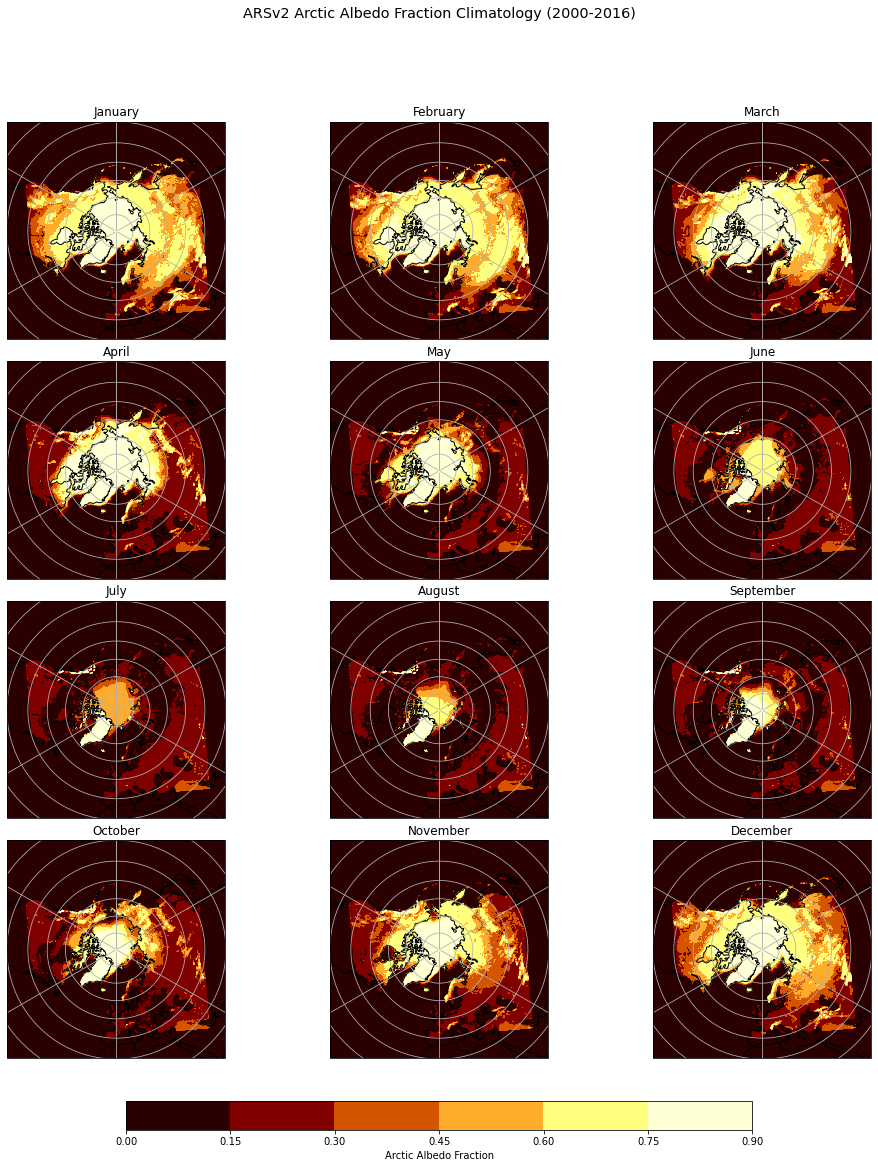

In [23]:
fig = plt.figure(figsize=(20,20))

fig, axs = plt.subplots(nrows=4,ncols=3,
                        subplot_kw={'projection': ccrs.NorthPolarStereo()},
                        figsize=(14.5,20))
axs=axs.flatten()

for i,m in enumerate( ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']):
    ax=axs[i]
    ds=clim['ALBEDO'][i]
    cs=ax.contourf(ds['lon'], ds['lat'], ds, 
            transform=ccrs.PlateCarree(),
            cmap='afmhot')
    
    # add reference lines
    ax.coastlines()
    ax.gridlines()
    
    ax.set_title(m)
    ax.set_extent([-180, 180, 30, 90], ccrs.PlateCarree())

fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.1)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Arctic Albedo Fraction', pad=0)

# Add a big title at the top
plt.suptitle('ARSv2 Arctic Albedo Fraction Climatology (2000-2016)', size='x-large')


#### Arctic Oscillation Index

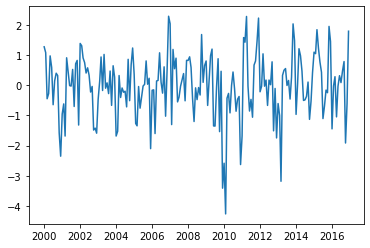

In [25]:
plt.plot(ao['time'],ao['ao'])

#### Nino34 Index

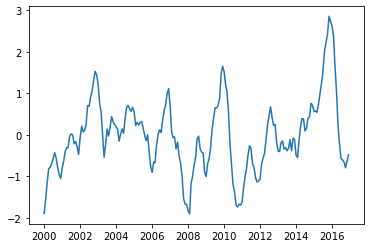

In [27]:
plt.plot(nino34['time'],nino34['sst'])

---

## Data Analysis

### Composite Analysis

#### Arctic Oscillation Index Correlation

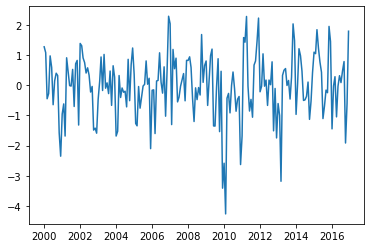

In [29]:
ao=xr.open_dataset('/home/ubuntu/indexes/ao.nc')
ao=ao.sel(time=slice('2000-01-01','2016-12-01'))
plt.plot(ao['time'],ao['ao'])

In [51]:
ao_rmap=xr.corr(ao['ao'],anoms['ALBEDO'],dim='time')

In [52]:
ao_rmap = regrid(ao_rmap, 'corr')
ao_rmap

Reuse existing file: bilinear_720x720_1801x3601.nc


/home/ubuntu/anaconda3/envs/clim680-xesmf/lib/python3.7/site-packages/xesmf/frontend.py:421: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


<xarray.Dataset>
Dimensions:  (lat: 900, lon: 3601)
Coordinates:
  * lon      (lon) float64 0.0 0.1 0.2 0.3 0.4 ... 359.6 359.7 359.8 359.9 360.0
  * lat      (lat) float64 0.1 0.2 0.3 0.4 0.5 0.6 ... 89.6 89.7 89.8 89.9 90.0
Data variables:
    corr     (lat, lon) float64 0.0 0.0 0.0 0.0 ... -0.04941 -0.04941 -0.04941

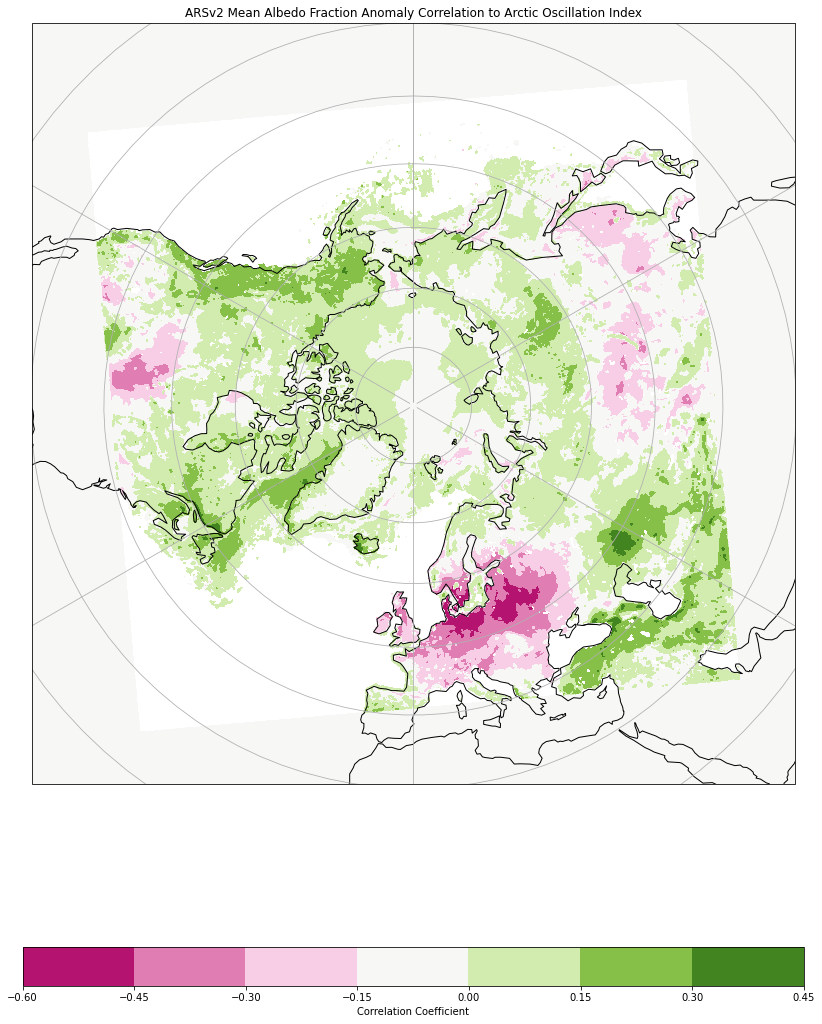

In [43]:
fig = plt.figure(figsize=(20,20))

# specify axis map projection
ax=plt.axes(projection=ccrs.NorthPolarStereo())

dr=ao_rmap

# make a filled contour plot
cs=ax.contourf(dr['lon'], dr['lat'], 
            dr['corr'], 
            transform=ccrs.PlateCarree(),
            cmap='PiYG')

ax.set_extent([-180, 180, 30, 90], ccrs.PlateCarree())


# add reference lines
ax.coastlines()
ax.gridlines()

cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,label='Correlation Coefficient')

plt.title('ARSv2 Mean Albedo Fraction Anomaly Correlation to Arctic Oscillation Index')
plt.show()

#### Nino3.4 Index Correlation

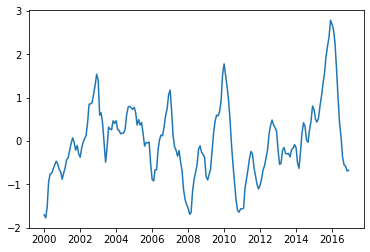

In [42]:
nino34=xr.open_dataset('/home/ubuntu/indexes/nino34.nc')
nino34=nino34.sel(time=slice('2000-01-01','2016-12-01'))
plt.plot(nino34['time'],nino34['sst'])

In [53]:
nino34_rmap=xr.corr(nino34['sst'],anoms['ALBEDO'],dim='time')
nino34_rmap

<xarray.DataArray (y: 720, x: 720)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.07340393, 0.06856396, 0.04399401, ...,        nan,        nan,
               nan],
       [0.08469747, 0.05378381, 0.0537877 , ...,        nan,        nan,
               nan],
       [0.04782837, 0.06634848, 0.04189594, ...,        nan,        nan,
               nan]])
Coordinates:
    lat      (y, x) float32 24.63 24.71 24.78 24.85 ... 24.85 24.78 24.71 24.63
    lon      (y, x) float32 140.0 140.1 140.2 140.2 ... -39.84 -39.92 -40.0
Dimensions without coordinates: y, x

In [54]:
nino34_rmap=regrid(nino34_rmap, 'corr')
nino34_rmap

Reuse existing file: bilinear_720x720_1801x3601.nc


/home/ubuntu/anaconda3/envs/clim680-xesmf/lib/python3.7/site-packages/xesmf/frontend.py:421: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


<xarray.Dataset>
Dimensions:  (lat: 900, lon: 3601)
Coordinates:
  * lon      (lon) float64 0.0 0.1 0.2 0.3 0.4 ... 359.6 359.7 359.8 359.9 360.0
  * lat      (lat) float64 0.1 0.2 0.3 0.4 0.5 0.6 ... 89.6 89.7 89.8 89.9 90.0
Data variables:
    corr     (lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.1406 0.1406 0.1406 0.1406

#### Nino34 and Albedo Correlation Map

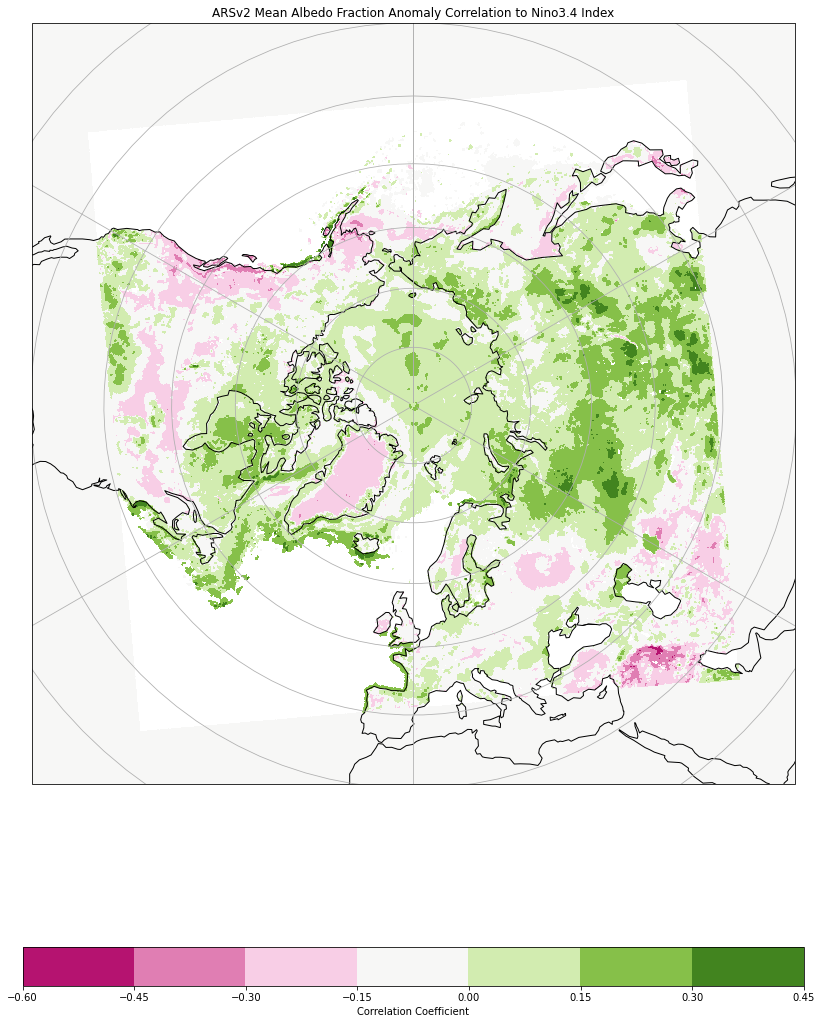

In [55]:
fig = plt.figure(figsize=(20,20))

# specify axis map projection
ax=plt.axes(projection=ccrs.NorthPolarStereo())

dr=nino34_rmap

# make a filled contour plot
cs=ax.contourf(dr['lon'], dr['lat'], 
            dr['corr'], 
            transform=ccrs.PlateCarree(),
            cmap='PiYG')

ax.set_extent([-180, 180, 30, 90], ccrs.PlateCarree())


# add reference lines
ax.coastlines()
ax.gridlines()

cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,label='Correlation Coefficient')

plt.title('ARSv2 Mean Albedo Fraction Anomaly Correlation to Nino3.4 Index')
plt.show()

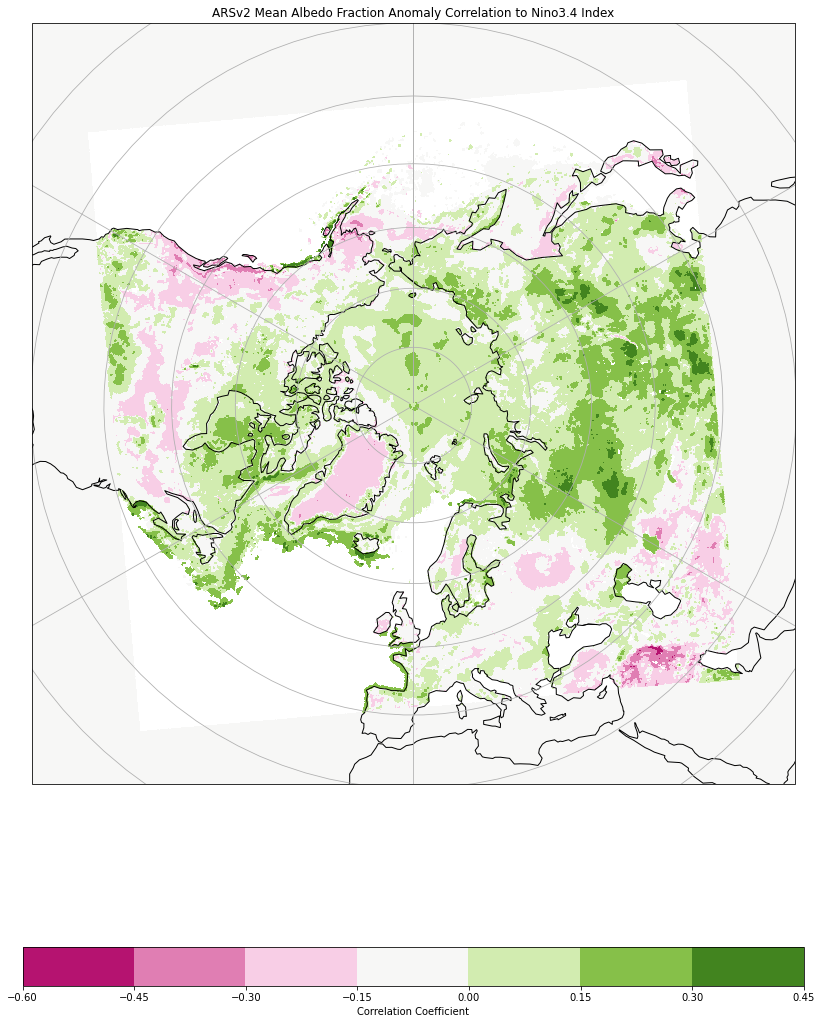

In [55]:
fig = plt.figure(figsize=(20,20))

# specify axis map projection
ax=plt.axes(projection=ccrs.NorthPolarStereo())

dr=nino34_rmap

# make a filled contour plot
cs=ax.contourf(dr['lon'], dr['lat'], 
            dr['corr'], 
            transform=ccrs.PlateCarree(),
            cmap='PiYG')

ax.set_extent([-180, 180, 30, 90], ccrs.PlateCarree())


# add reference lines
ax.coastlines()
ax.gridlines()

cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,label='Correlation Coefficient')

plt.title('ARSv2 Mean Albedo Fraction Anomaly Correlation to Nino3.4 Index')
plt.show()

### Linear Regression Analysis